In [1]:
import matplotlib.pyplot as plt
import numpy as np
import polars as pl
 

## 1.

$$ y = e^x - 2, y=cos(e^x - 2)$$

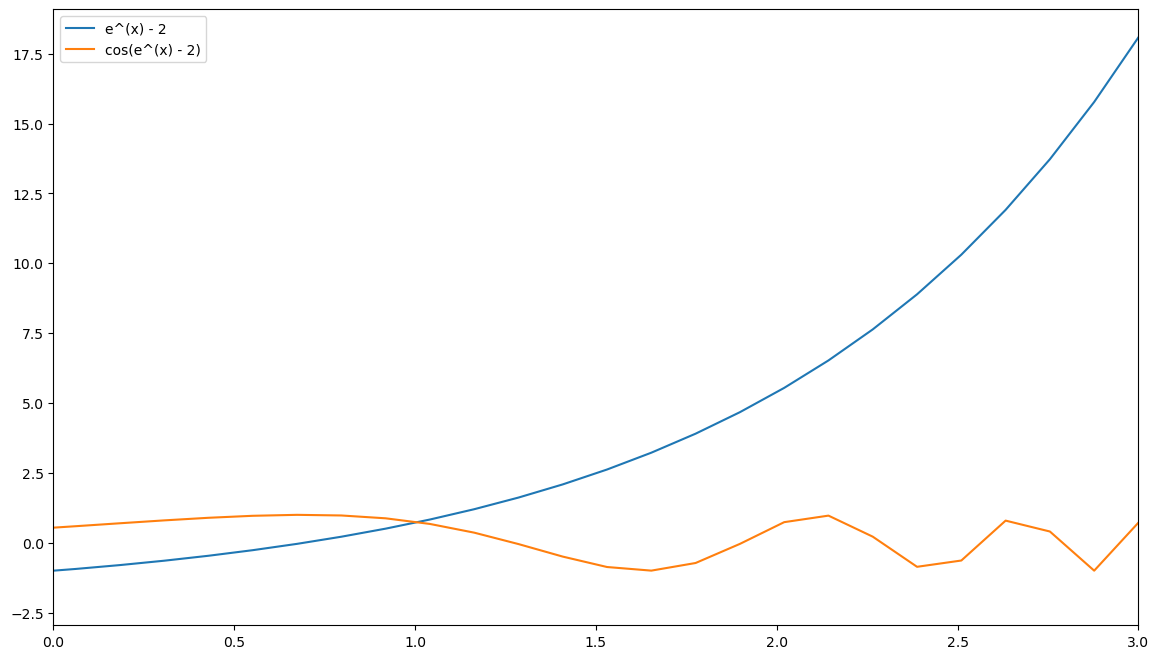

In [2]:
# Creating vector for plotting
x = np.linspace(-3, 3, 50)
 
fig = plt.figure(figsize = (14, 8))

y1 = np.exp(x)-2
plt.plot(x, y1, label ='e^(x) - 2')

y2 = np.cos(np.exp(x)-2)
plt.plot(x, y2, label ='cos(e^(x) - 2)')

# Add features to our figure
plt.legend()
plt.xlim([0, 3])

# show plot
plt.show()

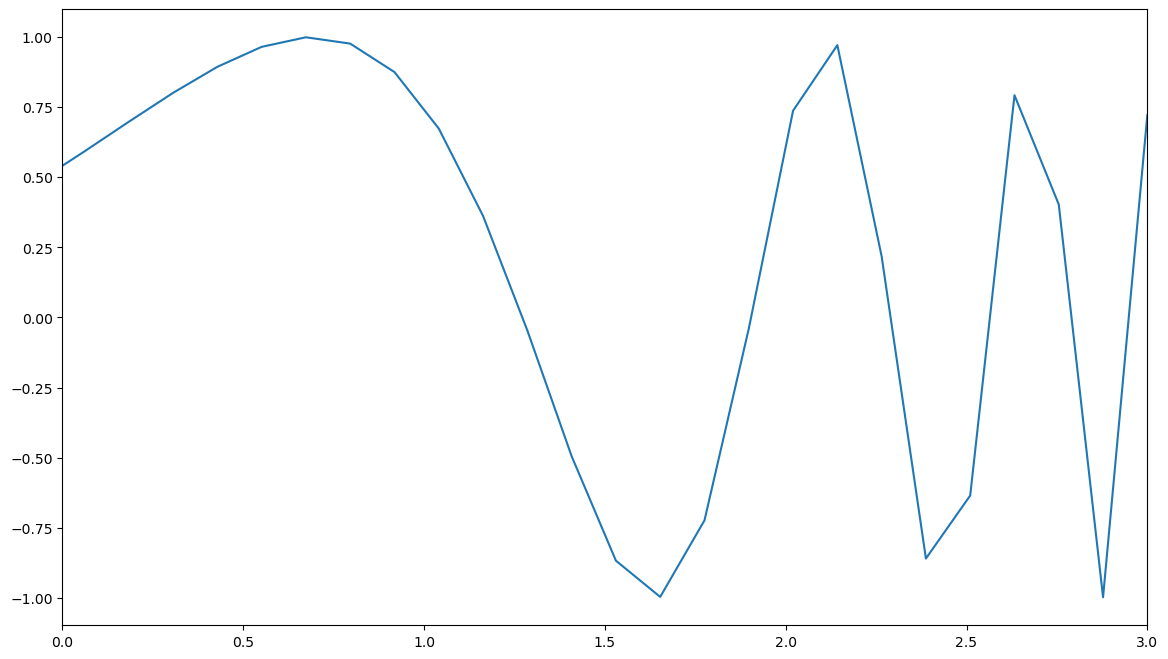

In [3]:
# plotting e^(x)-2 = cos( e^(x)-2 )

# Creating vector for plotting
x = np.linspace(-3, 3, 50)
 
fig_next = plt.figure(figsize = (14, 8))

y3 = (np.exp(x)-2)-np.cos(np.exp(x)-2)

plt.plot(x, y2, label ='e^(x) - 2 = cos(e^(x) - 2)')
plt.xlim([0,3])

plt.show()

let $a_n = 0.75, b_n=1.25$

from the theorem:
$$ |p-p_n| \leq \frac{b_n - a_n}{2^n}$$

We can calculate n from:

$$ \frac{1.25 - 0.75}{2^n} < 10^{-5} $$
$$ \Rightarrow {2^{-n}} < \frac{10^{-5}}{0.5} $$
$$ \Rightarrow -n = \frac{-5 - \log 0.5}{\log 2}  $$

Solving for how many iterations, or n, is needed to achieve an approximation with an error within $10^{-5}$ yields:



In [4]:
n_approx = -(-5 - np.log10(0.5))/np.log10(2)
print(n_approx)

15.609640474436812


Then, we can set n to 16

In [5]:
# set n to 16, a1 = 0.75, b1=1.25
iterations = 16
an = 0.75
bn = 1.25

In [6]:
def bisecting_iter_num1(iter, an, bn):
    
    # create dictionary to store iteration data
    val_table_dict = {'n': [], 'an': [], 'bn': [], 'pn': [], 
                        'f(pn)': []}
    
    # starting loop
    i = 0
    
    while i <= iter:
        
        
        # setting n and pn for each iteration
        n = i+1
        pn = (an+bn)/2
        
        fpn = (np.exp(pn)-2)-np.cos(np.exp(pn)-2)
        
        val_table_dict['n'].append(n)
        val_table_dict['an'].append(an)
        val_table_dict['bn'].append(bn)
        val_table_dict['pn'].append(pn)
        val_table_dict['f(pn)'].append(fpn)
        
        # break the loop if solution found earlier than expected:
        
        if fpn == 0:
            break
            
        # compare signs
        
        fan = (np.exp(an)-2)-np.cos(np.exp(an)-2)
        fbn = (np.exp(bn)-2)-np.cos(np.exp(bn)-2)
        
        if (fan>0 and fpn>0) or (fan<0 and fpn<0):
            an = pn
        elif (fbn>0 and fpn>0) or (fbn<0 and fpn<0):
            bn = pn
        
        i=i+1
    
    return val_table_dict


In [7]:
df_val_table = pl.DataFrame(bisecting_iter_num1(iterations, an, bn))

with pl.Config(tbl_rows = 17):
    print(df_val_table)

shape: (17, 5)
┌─────┬──────────┬───────────┬───────────┬───────────┐
│ n   ┆ an       ┆ bn        ┆ pn        ┆ f(pn)     │
│ --- ┆ ---      ┆ ---       ┆ ---       ┆ ---       │
│ i64 ┆ f64      ┆ f64       ┆ f64       ┆ f64       │
╞═════╪══════════╪═══════════╪═══════════╪═══════════╡
│ 1   ┆ 0.75     ┆ 1.25      ┆ 1.0       ┆ -0.034656 │
│ 2   ┆ 1.0      ┆ 1.25      ┆ 1.125     ┆ 0.60908   │
│ 3   ┆ 1.0      ┆ 1.125     ┆ 1.0625    ┆ 0.266982  │
│ 4   ┆ 1.0      ┆ 1.0625    ┆ 1.03125   ┆ 0.111148  │
│ 5   ┆ 1.0      ┆ 1.03125   ┆ 1.015625  ┆ 0.037003  │
│ 6   ┆ 1.0      ┆ 1.015625  ┆ 1.0078125 ┆ 0.000864  │
│ 7   ┆ 1.0      ┆ 1.0078125 ┆ 1.003906  ┆ -0.016973 │
│ 8   ┆ 1.003906 ┆ 1.0078125 ┆ 1.005859  ┆ -0.008073 │
│ 9   ┆ 1.005859 ┆ 1.0078125 ┆ 1.006836  ┆ -0.003609 │
│ 10  ┆ 1.006836 ┆ 1.0078125 ┆ 1.007324  ┆ -0.001374 │
│ 11  ┆ 1.007324 ┆ 1.0078125 ┆ 1.007568  ┆ -0.000255 │
│ 12  ┆ 1.007568 ┆ 1.0078125 ┆ 1.00769   ┆ 0.000305  │
│ 13  ┆ 1.007568 ┆ 1.00769   ┆ 1.007629  ┆ 0.00002

In [8]:
df_val_table.filter(pl.col('n') == 16).select([ 'pn', 'f(pn)'])

pn,f(pn)
f64,f64
1.007622,-0.00001


$p_{16} = 1.007622$ yielded $f(p_{16}) = -0.00001$, an approximation with an accuracy within $10^{-5}$

## 2.

$$ x = \frac{5}{x^2} + 2 $$

Earlier, it was established that the interval to be used is [2.25,3] as well as that the number of iterations needed to achieve an approximation accurate to within $10^{-5}$ is 17.

We let $p_0=2.25$

In [9]:
# set preliminary parameters

iter_num2 = 17
p0 = 2.25

In [10]:
# create function for iteration

def fixed_point_iter(iter, pn ):
    
    # create dictionary to store iteration data
    val_table_dict = {'n': [], 'pn': []}
    
    # starting loop
    i = 0
    
    while i <= iter:
        
        # get n, and pn+1
        n = i+1
        p = (5/(pn**2))+2
        
        # append 
        val_table_dict['n'].append(n)
        val_table_dict['pn'].append(p)
        
        if (abs(p-pn))==0:
            break
        
        pn = p
        
        i=i+1
        
    return val_table_dict
        

In [11]:
df_val_table_2 = pl.DataFrame(fixed_point_iter(iter_num2, p0))
with pl.Config(tbl_rows = 18):
    print(df_val_table_2)

shape: (18, 2)
┌─────┬──────────┐
│ n   ┆ pn       │
│ --- ┆ ---      │
│ i64 ┆ f64      │
╞═════╪══════════╡
│ 1   ┆ 2.987654 │
│ 2   ┆ 2.560156 │
│ 3   ┆ 2.762846 │
│ 4   ┆ 2.655023 │
│ 5   ┆ 2.709306 │
│ 6   ┆ 2.681168 │
│ 7   ┆ 2.69554  │
│ 8   ┆ 2.688143 │
│ 9   ┆ 2.691935 │
│ 10  ┆ 2.689987 │
│ 11  ┆ 2.690987 │
│ 12  ┆ 2.690473 │
│ 13  ┆ 2.690737 │
│ 14  ┆ 2.690602 │
│ 15  ┆ 2.690671 │
│ 16  ┆ 2.690635 │
│ 17  ┆ 2.690654 │
│ 18  ┆ 2.690644 │
└─────┴──────────┘


at n=17, $p_17 = 2.690654$. From our prior, calculations that 17 iterations are needed to get an approximation within $10^{-5}$. As we have achieved that, we can be sure that $p_17=2.690654$ is an approximation of the fixed-point solution that is accurate within $10^{-5}$.

# 3. 

## $\ln (x-1) + \cos (x-1) = 0$
Find approximations of the solution within an error of $10^{-5}$ using Newton's method, secant method, and false position method, for the interval [1.3, 2].

let f(x) = $\ln (x-1) + \cos (x-1)$,
and let $f'(x) = \frac{1}{x-1} - \sin(x-1)$ 

In [12]:
# Define initial parameters

max_n = 50

p0_3 = 1.3
p1_3 = 2

# We'll only use p1_3 for the secant and false position method

In [13]:
def newton_iter(iter, pn):
    
    # create dictionary for table of values:
    
    val_table_dict = {'n': [], 'pn-1': [], 'pn': [], 'f(pn)': [], 'pn - pn-1': []}
    
    # starting loop
    i = 0
    
    while i <= iter:
        
        n = i+1
        p = pn - (np.log(abs(pn-1)) + np.cos(pn-1) )/ ( (1/(pn-1)) - np.sin(pn-1) )
        
        fp = np.log(abs(p-1)) + np.cos(p-1)
        
        err = abs(p-pn)
        
        val_table_dict['n'].append(n)
        val_table_dict['pn'].append(p)
        val_table_dict['pn-1'].append(pn)
        val_table_dict['f(pn)'].append(fp)
        val_table_dict['pn - pn-1'].append(err)
        
        if fp == 0:
            break
        elif err < 10**(-5):
            break
        
        pn = p
        
        i=i+1
        
    return val_table_dict
        

In [14]:
df_val_newton = pl.DataFrame(newton_iter(max_n, p0_3))
with pl.Config(tbl_rows = 4):
    print(df_val_newton)

shape: (4, 5)
┌─────┬──────────┬──────────┬─────────────┬───────────┐
│ n   ┆ pn-1     ┆ pn       ┆ f(pn)       ┆ pn - pn-1 │
│ --- ┆ ---      ┆ ---      ┆ ---         ┆ ---       │
│ i64 ┆ f64      ┆ f64      ┆ f64         ┆ f64       │
╞═════╪══════════╪══════════╪═════════════╪═══════════╡
│ 1   ┆ 1.3      ┆ 1.381847 ┆ -0.034757   ┆ 0.081847  │
│ 2   ┆ 1.381847 ┆ 1.397321 ┆ -0.00091    ┆ 0.015474  │
│ 3   ┆ 1.397321 ┆ 1.397748 ┆ -6.6247e-7  ┆ 0.000427  │
│ 4   ┆ 1.397748 ┆ 1.397748 ┆ -3.5116e-13 ┆ 3.1148e-7 │
└─────┴──────────┴──────────┴─────────────┴───────────┘


In [15]:
# pn1 = p_{n-1}, pn2 = p_{n-2}, that is pn1 is the bigger number, or rightmost
def secant_iter(iter, pn1, pn2):
    
    # create dictionary for table of values:
    
    val_table_dict = {'n': [], 'pn-1': [], 'pn-2': [], 'pn': [], 'f(pn)': [], 'pn - pn-1': []}
    
    # starting loop
    i = 0
    
    while i <= iter:
        
        n = i+1
        
        fpn1 = np.log(abs(pn1-1)) + np.cos(pn1-1)
        fpn2 = np.log(abs(pn2-1)) + np.cos(pn2-1)
        
        pn = pn1 - (fpn1 * (pn1 - pn2))/(fpn1 - fpn2)
        
        fpn = np.log(abs(pn-1)) + np.cos(pn-1)
        
        err = abs(pn-pn1)
        
        val_table_dict['n'].append(n)
        val_table_dict['pn'].append(pn)
        val_table_dict['f(pn)'].append(fpn)
        val_table_dict['pn - pn-1'].append(err)
        val_table_dict['pn-1'].append(pn1)
        val_table_dict['pn-2'].append(pn2)
        
        if fpn == 0:
            break
        elif err < 10**(-5):
            break
        
        pn2 = pn1
        pn1 = pn
        
        i=i+1
        
    return val_table_dict

In [16]:
df_val_secant = pl.DataFrame(secant_iter(max_n, p1_3, p0_3), strict=False)
with pl.Config(tbl_rows = 8):
    print(df_val_secant)

shape: (8, 6)
┌─────┬──────────┬──────────┬──────────┬─────────────┬───────────┐
│ n   ┆ pn-1     ┆ pn-2     ┆ pn       ┆ f(pn)       ┆ pn - pn-1 │
│ --- ┆ ---      ┆ ---      ┆ ---      ┆ ---         ┆ ---       │
│ i64 ┆ f64      ┆ f64      ┆ f64      ┆ f64         ┆ f64       │
╞═════╪══════════╪══════════╪══════════╪═════════════╪═══════════╡
│ 1   ┆ 2.0      ┆ 1.3      ┆ 1.520607 ┆ 0.214758    ┆ 0.479393  │
│ 2   ┆ 1.520607 ┆ 2.0      ┆ 1.204358 ┆ -0.608692   ┆ 0.316249  │
│ 3   ┆ 1.204358 ┆ 1.520607 ┆ 1.438128 ┆ 0.080304    ┆ 0.233771  │
│ 4   ┆ 1.438128 ┆ 1.204358 ┆ 1.410882 ┆ 0.02732     ┆ 0.027247  │
│ 5   ┆ 1.410882 ┆ 1.438128 ┆ 1.396833 ┆ -0.00195    ┆ 0.014049  │
│ 6   ┆ 1.396833 ┆ 1.410882 ┆ 1.397769 ┆ 0.000044    ┆ 0.000936  │
│ 7   ┆ 1.397769 ┆ 1.396833 ┆ 1.397749 ┆ 6.8013e-8   ┆ 0.00002   │
│ 8   ┆ 1.397749 ┆ 1.397769 ┆ 1.397748 ┆ -2.3767e-12 ┆ 3.1980e-8 │
└─────┴──────────┴──────────┴──────────┴─────────────┴───────────┘


In [17]:
# pn1 = p_{n-1}, pn2 = p_{n-2}, that is pn1 is the bigger number, or rightmost
def false_position_iter(iter, pn1, pn2, pn3=0):
    
    # create dictionary for table of values:
    
    val_table_dict = {'n': [], 'pn-1': [], 'pn-2': [], 'pn-3': [], 'pn': [], 'f(pn)': [], 'pn - pn-1': []}
    
    # starting loop
    i = 0
    
    while i <= iter:
        
        n = i+1
        
        fpn1 = np.log(abs(pn1-1)) + np.cos(pn1-1)
        fpn2 = np.log(abs(pn2-1)) + np.cos(pn2-1)
        fpn3 = np.log(abs(pn3-1)) + np.cos(pn3-1)
        
        if (fpn1 * fpn2) < 0:
            pn = pn1 - (fpn1 * (pn1 - pn2))/(fpn1 - fpn2)
            checker = 0

        else:
            if (fpn1 * fpn3) < 0:
                pn = pn1 - (fpn1 * (pn1 - pn3))/(fpn1 - fpn3)
                checker = 1
        
        fpn = np.log(abs(pn-1)) + np.cos(pn-1)
        
        err = abs(pn-pn1)
        
        val_table_dict['n'].append(n)
        val_table_dict['pn'].append(pn)
        val_table_dict['f(pn)'].append(fpn)
        val_table_dict['pn - pn-1'].append(err)
        val_table_dict['pn-1'].append(pn1)
        val_table_dict['pn-2'].append(pn2)
        val_table_dict['pn-3'].append(pn3)
        
        if fpn == 0:
            break
        elif err < 10**(-5):
            break
        
        # pn3 becomes pn2, and pn2 becomes pn3, and pn3 = pn2 for next iter
        
        if checker == 0:
            pn3 = pn2
            pn2 = pn1
            pn1 = pn
            
        elif checker == 1:
            # pn3 = pn3
            # pn3 becomes pn2, and pn2 becomes pn3, and pn3 = pn2 for next iter
            pn2 = pn1
            pn1 = pn
        
        i=i+1
        
    return val_table_dict


In [18]:
df_val_false_position = pl.DataFrame( false_position_iter(max_n, p1_3, p0_3), strict=False)
with pl.Config(tbl_rows = 20):
    print(df_val_false_position)

shape: (8, 7)
┌─────┬──────────┬──────────┬──────┬──────────┬───────────┬───────────┐
│ n   ┆ pn-1     ┆ pn-2     ┆ pn-3 ┆ pn       ┆ f(pn)     ┆ pn - pn-1 │
│ --- ┆ ---      ┆ ---      ┆ ---  ┆ ---      ┆ ---       ┆ ---       │
│ i64 ┆ f64      ┆ f64      ┆ f64  ┆ f64      ┆ f64       ┆ f64       │
╞═════╪══════════╪══════════╪══════╪══════════╪═══════════╪═══════════╡
│ 1   ┆ 2.0      ┆ 1.3      ┆ 0.0  ┆ 1.520607 ┆ 0.214758  ┆ 0.479393  │
│ 2   ┆ 1.520607 ┆ 2.0      ┆ 1.3  ┆ 1.418368 ┆ 0.042359  ┆ 0.102239  │
│ 3   ┆ 1.418368 ┆ 1.520607 ┆ 1.3  ┆ 1.401138 ┆ 0.007166  ┆ 0.01723   │
│ 4   ┆ 1.401138 ┆ 1.418368 ┆ 1.3  ┆ 1.398304 ┆ 0.001181  ┆ 0.002833  │
│ 5   ┆ 1.398304 ┆ 1.401138 ┆ 1.3  ┆ 1.39784  ┆ 0.000194  ┆ 0.000465  │
│ 6   ┆ 1.39784  ┆ 1.398304 ┆ 1.3  ┆ 1.397763 ┆ 0.000032  ┆ 0.000076  │
│ 7   ┆ 1.397763 ┆ 1.39784  ┆ 1.3  ┆ 1.397751 ┆ 0.000005  ┆ 0.000012  │
│ 8   ┆ 1.397751 ┆ 1.397763 ┆ 1.3  ┆ 1.397749 ┆ 8.5220e-7 ┆ 0.000002  │
└─────┴──────────┴──────────┴──────┴──────────┴───

From the 3 attempts at approximating $\ln (x-1) + \cos (x-1) = 0$, we get that $p_n = 1.397749 $, or $pn = 1.397749$, is an approximation of the root finding problem that has an accuracy within $10^{-5}$.

Newton's method got the approximation at the shortest iterations (4). The Secant and False Position achieved the same answer, albeit at a slower 8 iterations for both methods.